In [20]:
import random
import time
import matplotlib.pyplot as plt

In [1]:
def partition(arr, p, r):
    x = arr[r]
    i = p - 1
    for j in range(p, r):
        if arr[j] < x:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[r] = arr[r], arr[i + 1]
    return i + 1

In [16]:
def quicksort(arr, p, r):
  stack = [(p,r)]
  while stack:
    p,r = stack.pop()
    if p< r:
        q = partition(arr, p, r)
        stack.append(( p, q - 1))
        stack.append(( q + 1, r))

In [17]:
def quicksort_random_pivot(arr):
    quicksort_random_pivot_helper(arr, 0, len(arr) - 1)


def quicksort_random_pivot_helper(arr, p, r):
    if p < r:
        x_index = random.randint(p, r)
        arr[x_index], arr[r] = arr[r], arr[x_index]
        q = partition(arr, p, r)
        quicksort_random_pivot_helper(arr, p , q- 1)
        quicksort_random_pivot_helper(arr, q + 1, r)

In [18]:
# Benchmarks
def generate_best_case_input(n):
    return list(range(n))

def generate_worst_case_input(n):
    return list(range(n, 0, -1))

def generate_average_case_input(n):
    return [random.randint(0, 1000) for _ in range(n)]

def benchmark(sort_function, input_generator, input_sizes):
    times = []
    for n in input_sizes:
        arr = input_generator(n)
        start_time = time.time()
        sort_function(arr, 0, len(arr) - 1)
        end_time = time.time()
        times.append(end_time - start_time)
    return times


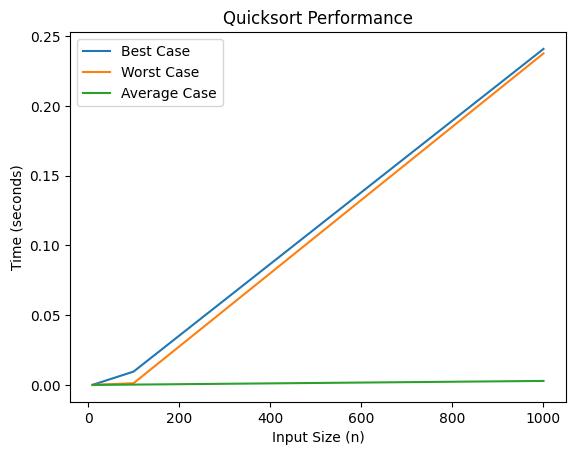

In [21]:
input_sizes = [10, 100, 1000]

best_case_times = benchmark(quicksort, generate_best_case_input, input_sizes)
worst_case_times = benchmark(quicksort, generate_worst_case_input, input_sizes)
average_case_times = benchmark(quicksort, generate_average_case_input, input_sizes)

plt.plot(input_sizes, best_case_times, label='Best Case')
plt.plot(input_sizes, worst_case_times, label='Worst Case')
plt.plot(input_sizes, average_case_times, label='Average Case')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Quicksort Performance')
plt.legend()
plt.show()